In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final year/btc_tx_anomaly_detection/data/cleaned_undersampled_data.csv', index_col=False)

In [ ]:
y = df['is_fraud']
X = df.drop('is_fraud', axis=1)

In [ ]:
model = IsolationForest(n_estimators=200, random_state=42, n_jobs=-1)
IForest = model.fit(X)
predictions = IForest.predict(X)

In [ ]:
  # Convert anomaly scores to binary predictions
binary_predictions = (predictions == -1).astype(int)

In [ ]:
# Plot ROC curve
def plot_roc(y_pred, fpr, tpr):

  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(4, 4))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')


  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

## Confusion Matrix

In [ ]:
def display_cm(y_true, predictions):

  cm = confusion_matrix(y_true, predictions)

  # Plot the confusion matrix as a heatmap
  plt.figure(figsize=(8, 6))

  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{:.2%}'.format(value) for value in (cm / cm.sum(axis=1)[:, np.newaxis]).flatten()]
  labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)
  tick_labels = ['Non-Fraud', 'Fraud']
  sns.heatmap(cm, annot=labels, fmt='s', xticklabels=tick_labels, yticklabels=tick_labels)

  plt.title('Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

  # Print classification report for additional metrics
  print("Classification Report:")
  print(classification_report(y_true, predictions))


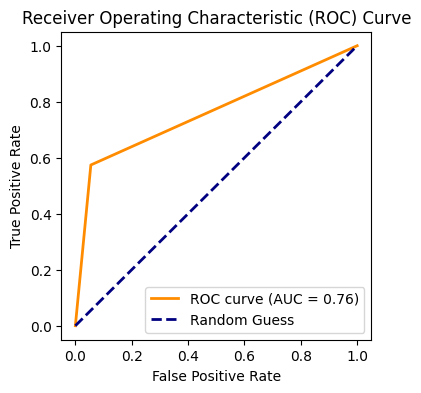

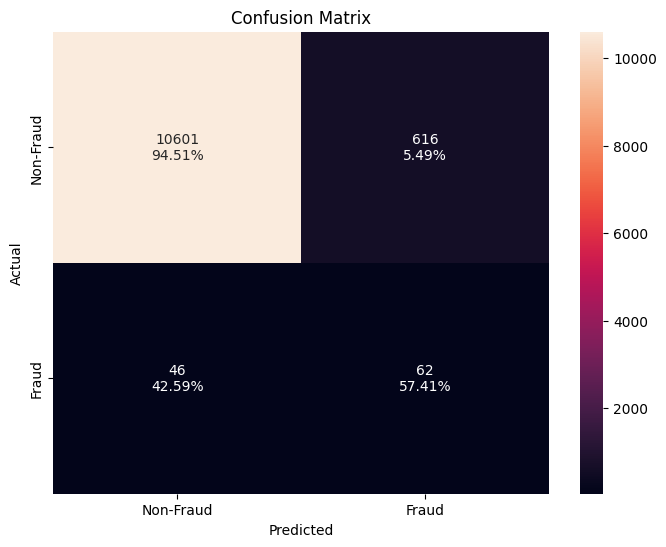

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     11217
         1.0       0.09      0.57      0.16       108

    accuracy                           0.94     11325
   macro avg       0.54      0.76      0.56     11325
weighted avg       0.99      0.94      0.96     11325



In [ ]:
# plot the roc curve
fpr, tpr, thresholds = roc_curve(y, binary_predictions, pos_label=1)
plot_roc(binary_predictions, fpr, tpr)
# take a deeper look and see how the model predicted the samples
display_cm(y, binary_predictions)

In [ ]:
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

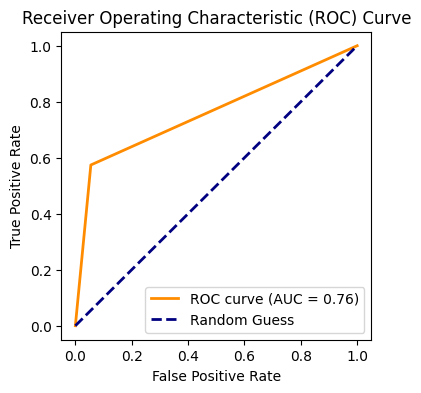

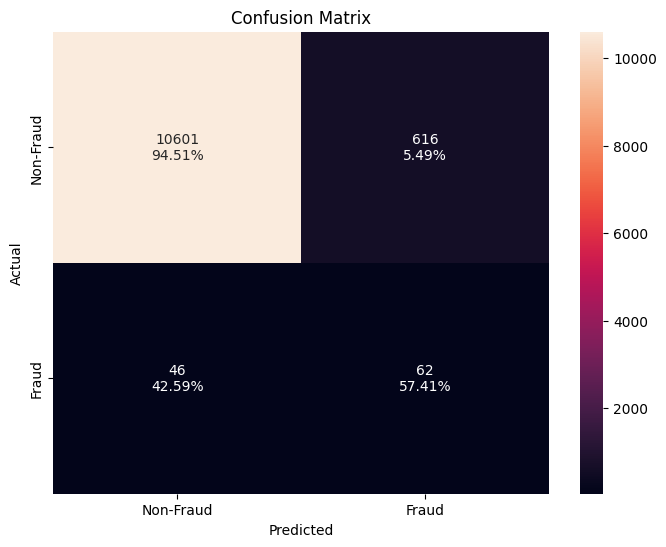

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     11217
         1.0       0.09      0.57      0.16       108

    accuracy                           0.94     11325
   macro avg       0.54      0.76      0.56     11325
weighted avg       0.99      0.94      0.96     11325



In [ ]:
IForest_smote = model.fit(X_resampled)
predictions_smote = IForest_smote.predict(X)
binary_predictions_smote = (predictions == -1).astype(int)
# plot the roc curve
fpr, tpr, thresholds = roc_curve(y, binary_predictions_smote, pos_label=1)
plot_roc(binary_predictions_smote, fpr, tpr)
# take a deeper look and see how the model predicted the samples
display_cm(y, binary_predictions_smote)